# **Waze Project**

## ChurnGuard: Predictive User Retention for Waze
### Project goal:

#### To develop a machine learning model to predict user churn. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

### Background:

#### Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.

## Get Started with Python
#### To get clear insights, the user data must be inspected and prepared for the upcoming process of exploratory data analysis (EDA).

## Inspect and analyze data


### Imports and data loading
#### Start by importing the packages that you will need to load and explore the dataset and then load the dataset into a dataframe. Creating a dataframe will help you conduct data manipulation, exploratory data analysis (EDA), and statistical activities.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('waze_dataset.csv')


### Summary information

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### 1. When reviewing the `df.head()` output, are there any variables that have missing values?
   #### Answer: None of the variables in the first 10 observations have missing values. Note that this does not imply the whole dataset does not have any missing values.

#### 2. When reviewing the `df.info()` output, what are the data types? How many rows and columns do you have?
   #### Answer: The variables label and device are of type object; total_sessions, driven_km_drives, and duration_minutes_drives are of type float64; the rest of the variables are of type int64. There are 14,999 rows and 13 columns.

#### 3. Does the dataset have any missing values?
   #### Answer: The dataset has 700 missing values in the label column.

### Null values and summary statistics
#### Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

In [5]:
# Isolate rows with null values
null_df = df[df['label'].isnull()]
# Display summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]
# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


#### Question: Is there a discernible difference between the two populations?
  #### Answer: Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

### Null values - device counts
#### Check the two populations with respect to the device variable.

In [7]:
# Get count of null values by device
null_df['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

#### Question: How many iPhone users had null values and how many Android users had null values?
  #### Answer: Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.

In [8]:
# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [9]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

#### Question: How does this compare to the device ratio in the full dataset?
   #### Answer: The percentage of missing values by each device is consistent with their representation in the data overall.There is nothing to suggest a non-random cause of the missing data.

#### Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [10]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

retained    11763
churned      2536
Name: label, dtype: int64

retained    0.822645
churned     0.177355
Name: label, dtype: float64


#### Answer: This dataset contains 82% retained users and 18% churned users.

#### Next, compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that you don't want outliers to unduly affect the portrayal of a typical user. Notice, for example, that the maximum value in the driven_km_drives column is 21,183 km. That's more than half the circumference of the earth!

In [11]:
# Calculate median values of all columns for churned and retained users
df.groupby(['label']).median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


#### This offers an interesting snapshot of the two groups, churned vs. retained:

####  Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

#### The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

#### It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

#### Calculate the median kilometers per drive in the last month for both retained and churned users.

#### Begin by dividing the driven_km_drives column by the drives column. Then, group the results by churned/retained and calculate the median km/drive of each group.

In [12]:
# Add a column to df called `km_per_drive`
df['km_per_drive']=df['driven_km_drives']/df['drives']
# Group by `label`, calculate the median, and isolate for km per drive
df.groupby(['label']).median(numeric_only=True)[['km_per_drive']]

,km_per_drive
label,
churned,74.109416
retained,75.014702


#### Answer: The median retained user drove about one more kilometer per drive than the median churned user.

#### Question How many kilometers per driving day was this?
#### To calculate this statistic, repeat the steps above using driving_days instead of drives.

In [13]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_days']=df['driven_km_drives']/df['driving_days']
# Group by `label`, calculate the median, and isolate for km per driving day
df.groupby(['label']).median(numeric_only=True)[['km_per_driving_days']]

,km_per_driving_days
label,
churned,697.541999
retained,289.549333


#### Now calculate the median number of drives per driving day for each group.

In [14]:
# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_days']=df['drives']/df['driving_days']
# Group by `label`, calculate the median, and isolate for drives per driving day
df.groupby(['label']).median(numeric_only=True)[['drives_per_driving_days']]

,drives_per_driving_days
label,
churned,10.0000
retained,4.0625


#### The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

#### It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of churned users—contains a high proportion of long-haul truckers.

#### In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

#### Finally, examine whether there is an imbalance in how many users churned by device type.

#### Begin by getting the overall counts of each device type for each group, churned and retained.

In [15]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label','device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

#### Question: Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone?

In [16]:
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

#### Answer: The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

# Exploratory data analysis
#### The purpose of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

### Imports and data loading

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset into a dataframe
df=pd.read_csv('waze_dataset.csv')

### Data exploration and cleaning
#### head()
#### size
#### describe()
#### info()
#### shape

In [19]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [20]:
df.size

194987

In [21]:
df.shape

(14999, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [23]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### Visualizations
#### Select data visualization types that will help you understand and explain the data.

#### Question: What type of data visualization(s) will be most helpful?

#### Line graph
#### Bar chart
#### Box plot
#### Histogram
#### Heat map
#### Scatter plot
#### A geographic map

#### Answer:

#### Box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of drives, sessions and all other continuous numeric variables
#### Histograms are essential to understand the distribution of variables
#### Scatter plots will be helpful to visualize relationships between variables
#### Bar charts are useful for communicating levels and quantities, especially for categorical information

### sessions
#### The number of occurrences of a user opening the app during the month

Text(0.5, 1.0, 'Session Box Plot')

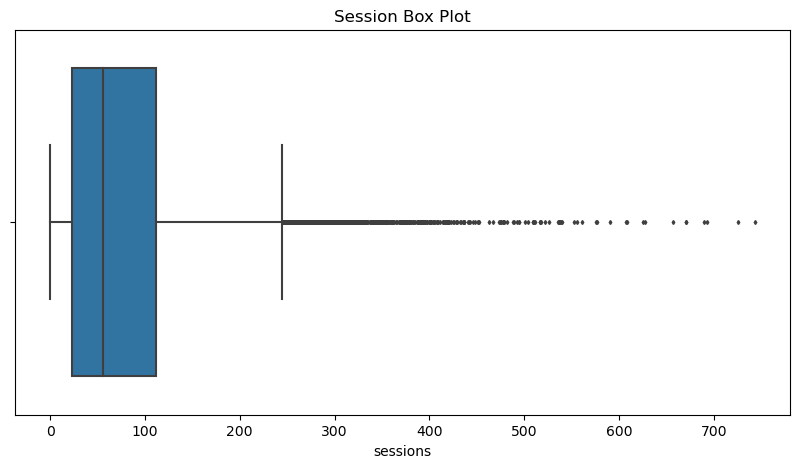

In [24]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df['sessions'],fliersize=2)
plt.title('Session Box Plot')

Text(0.5, 1.0, 'session box plot')

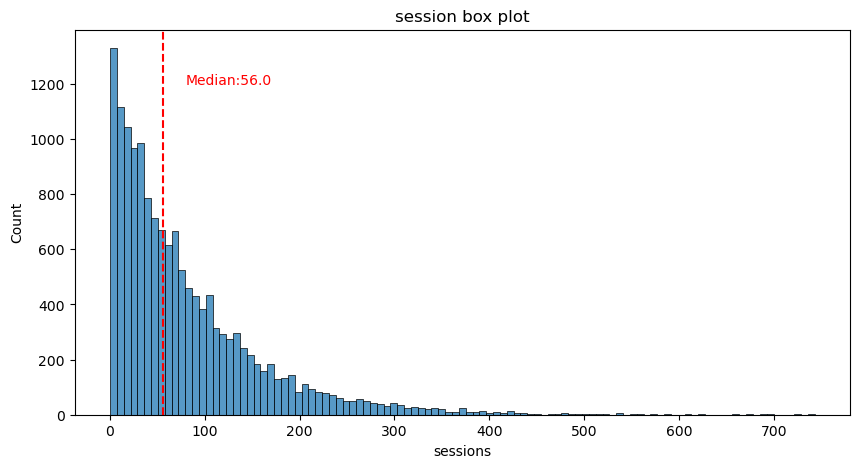

In [25]:
plt.figure(figsize=[10,5])
sns.histplot(df['sessions'])
med=df['sessions'].median()
plt.axvline(med,color='red',linestyle='--')
plt.text(80,1200,'Median:56.0',color='red')
plt.title('session box plot')

#### The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

### drives
#### An occurrence of driving at least 1 km during the month

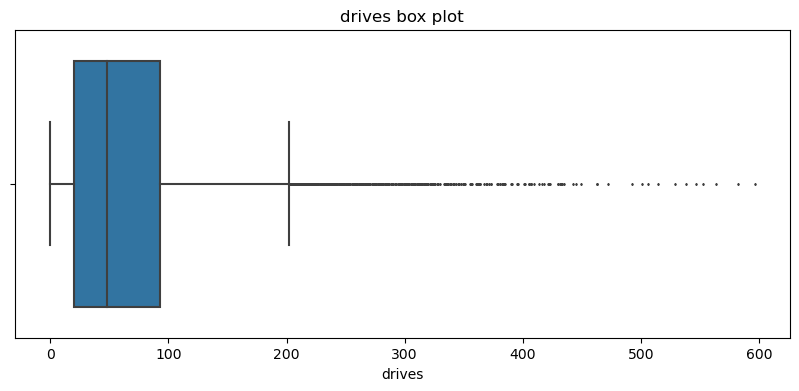

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

#### As you perform EDA, you'll find that many tasks get repeated, such as plotting histograms of features. Remember that whenever you find yourself copy/pasting code, it's worth considering whether a function would help make your work more efficient. Sometimes it's not worth it. Other times, defining a function will help a lot.

In [27]:
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

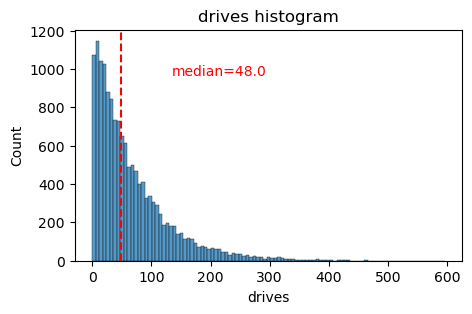

In [28]:
histogrammer('drives')

#### The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

### total_sessions
#### A model estimate of the total number of sessions since a user has onboarded

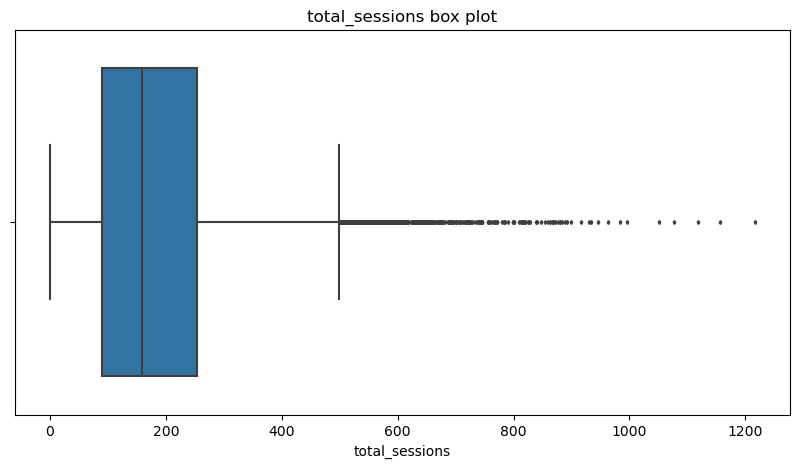

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['total_sessions'], fliersize=2)
plt.title('total_sessions box plot');

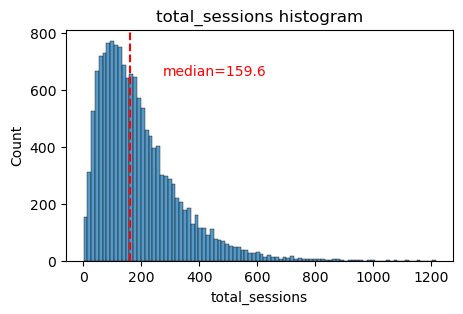

In [30]:
histogrammer('total_sessions')

The total_sessions is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month.

### n_days_after_onboarding
#### The number of days since a user signed up for the app

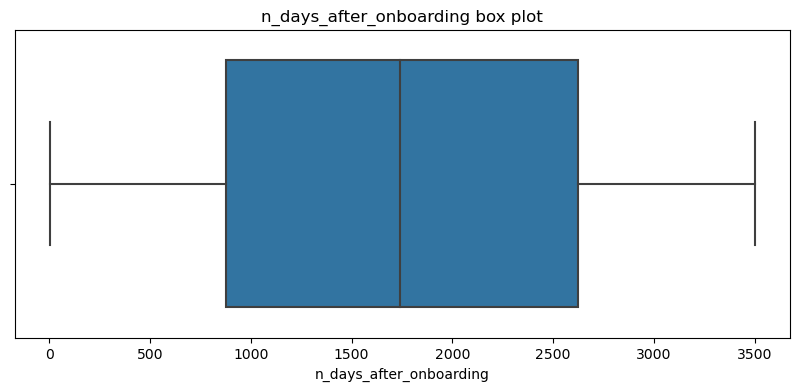

In [31]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=2)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


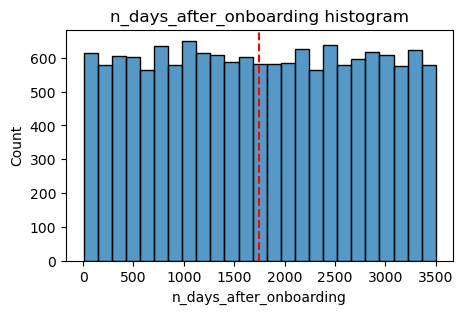

In [32]:
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from nearzero to 3,500 (9.5 years).

### driven_km_drives
#### Total kilometers driven during the month

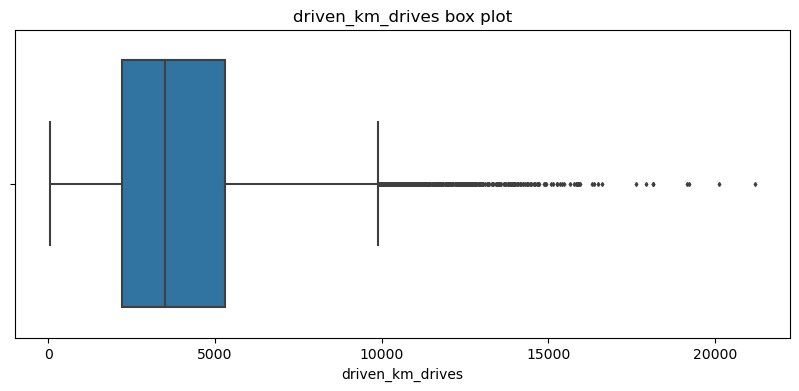

In [33]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['driven_km_drives'], fliersize=2)
plt.title('driven_km_drives box plot');

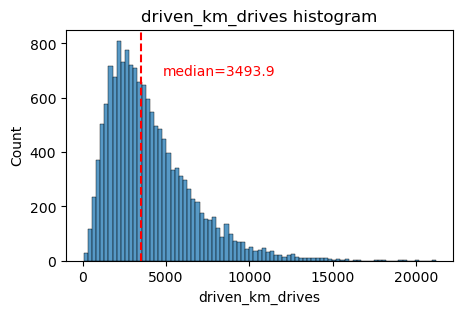

In [34]:
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers.

### duration_minutes_drives
#### Total duration driven in minutes during the month

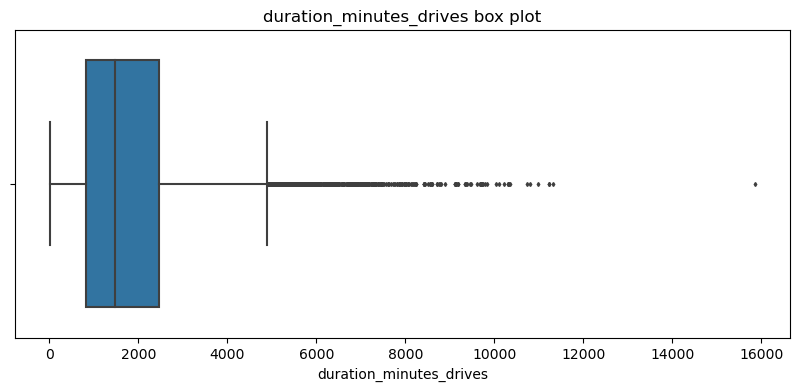

In [35]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=2)
plt.title('duration_minutes_drives box plot');

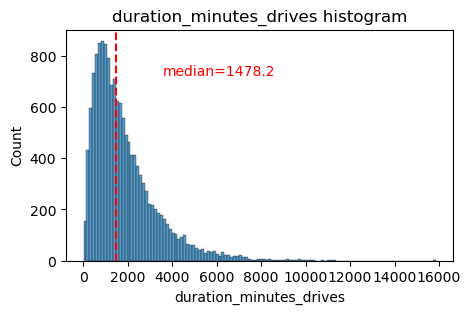

In [36]:
histogrammer('duration_minutes_drives')

The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than 1,478 minutes (25 hours), but some users clocked over 250 hours over the month.

### activity_days
#### Number of days the user opens the app during the month

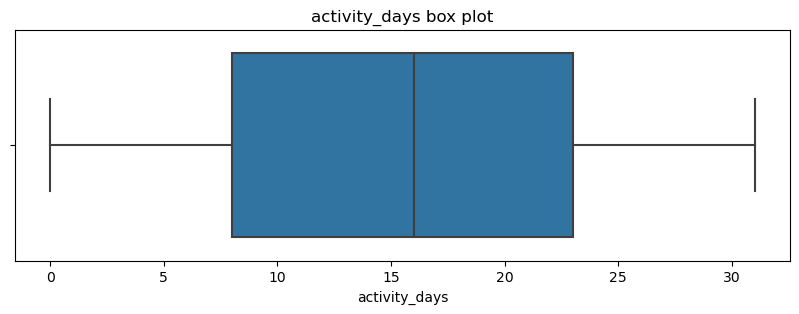

In [37]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['activity_days'], fliersize=2)
plt.title('activity_days box plot');

Median: 16.0


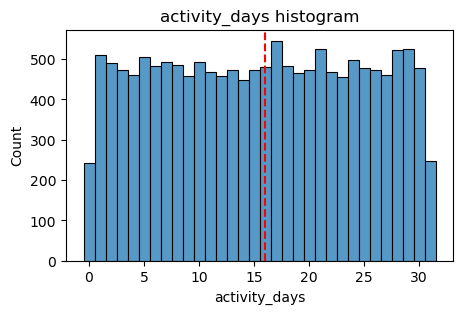

In [38]:
histogrammer('activity_days', median_text=False, discrete=True)

### driving_days
#### Number of days the user drives (at least 1 km) during the month

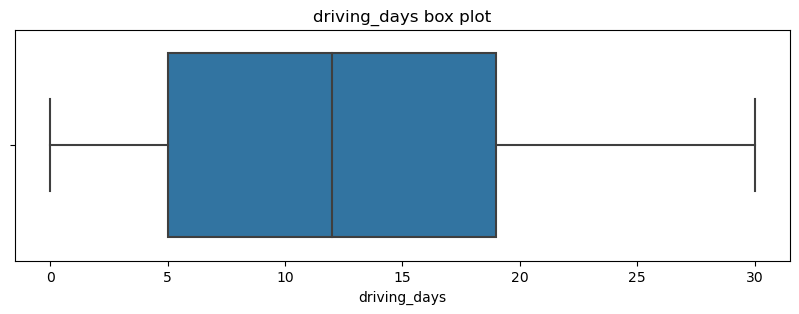

In [39]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['driving_days'], fliersize=2)
plt.title('driving_days box plot');

Median: 12.0


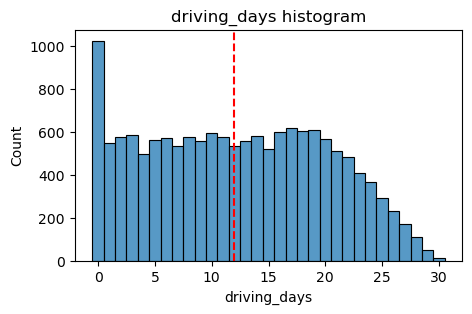

In [40]:
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.

However, there were almost twice as many users (1,000 vs. 550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from activity_days. That variable had 500 users opening the app on each of most of the day counts, but there were only 250 users who did not open the app at all during the month and 250 users who opened the app every day.

### device
#### The type of device a user starts a session with

#### This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

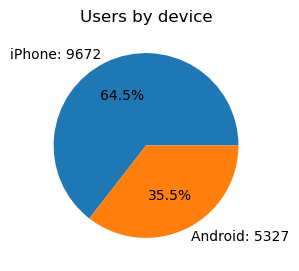

In [41]:
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

### label
#### Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month


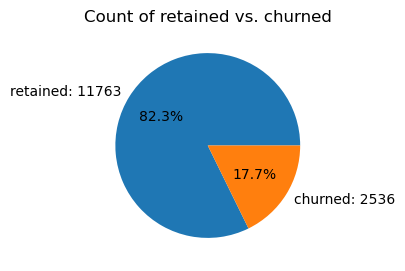

In [42]:
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

### driving_days vs. activity_days
#### Because both driving_days and activity_days represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

#### Plot a histogram that, for each day, has a bar representing the counts of driving_days and user_days.

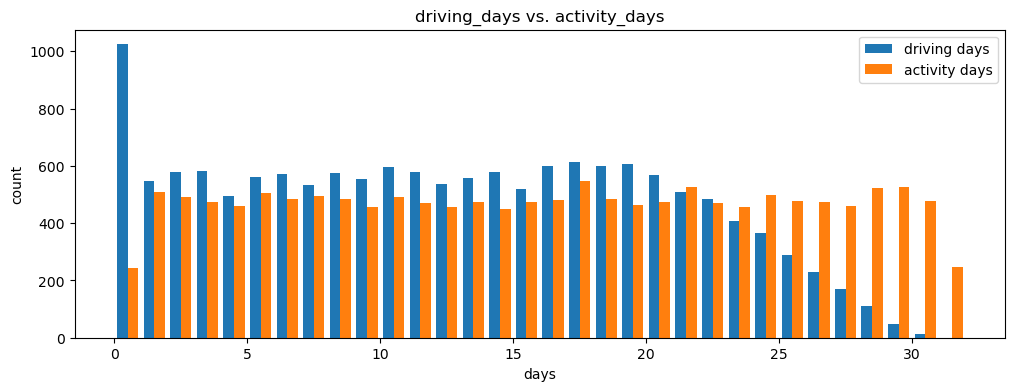

In [43]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

#### Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`

In [44]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

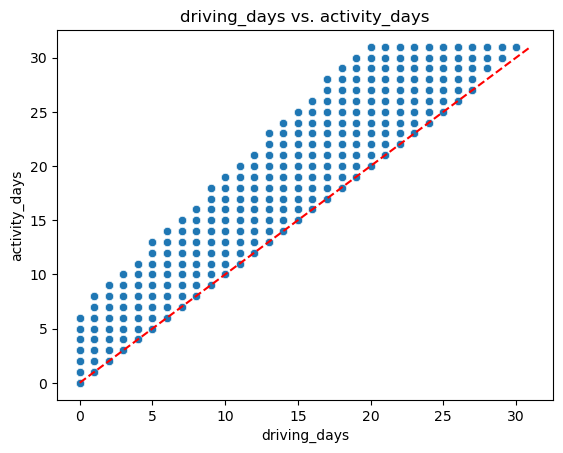

In [45]:
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

### Retention by device
#### Plot a histogram that has four bars—one for each device-label combination—to show how many iPhone users were retained/churned and how many Android users were retained/churned.

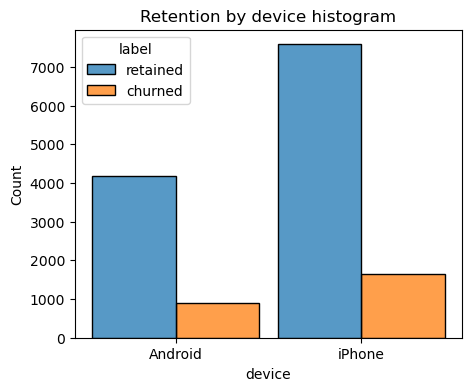

In [46]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

#### In the previous  you discovered that the median distance driven per driving day last month for users who churned was 608.78 km, versus 247.48 km for people who did not churn. Examine this further.

#### 1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

#### 2. Call the `describe()` method on the new column.

In [47]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [48]:
df.loc[df['km_per_driving_day']==np.inf,'km_per_driving_day']=0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

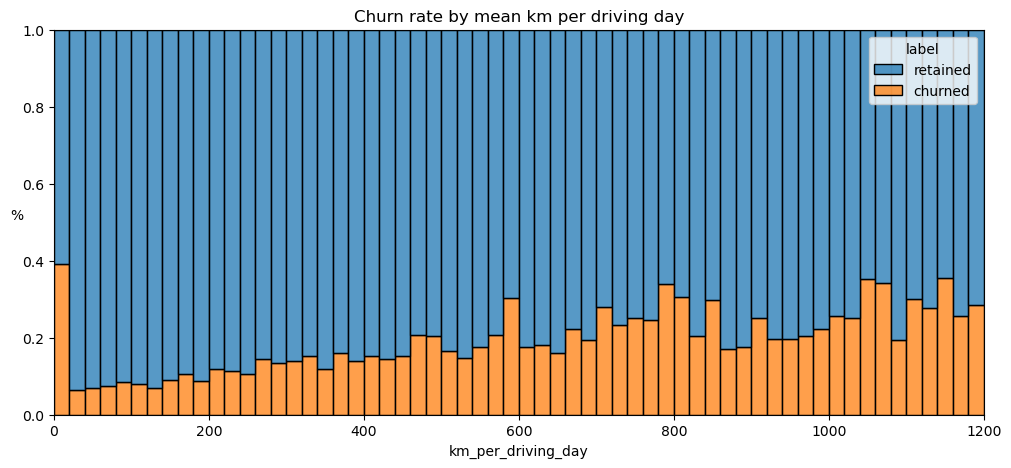

In [49]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

### Churn rate per number of driving days
#### Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

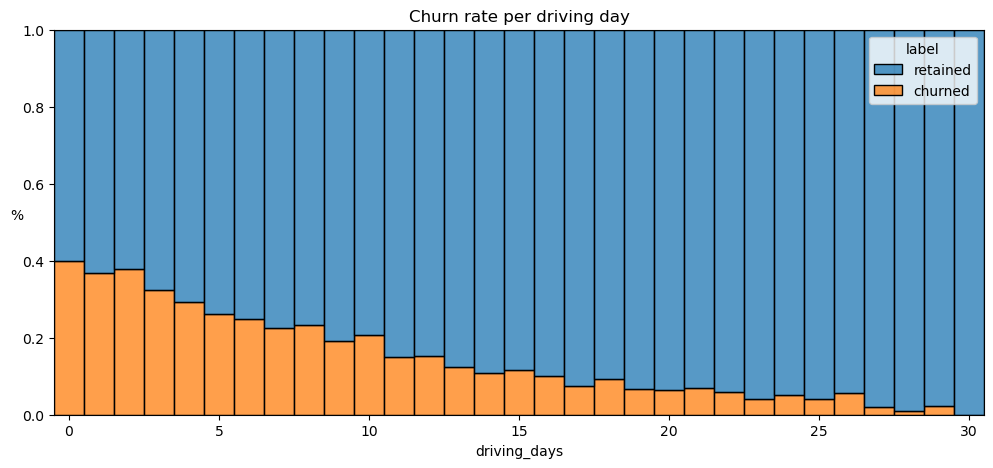

In [50]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

### Proportion of sessions that occurred in the last month
#### Create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.

In [51]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Median: 0.4


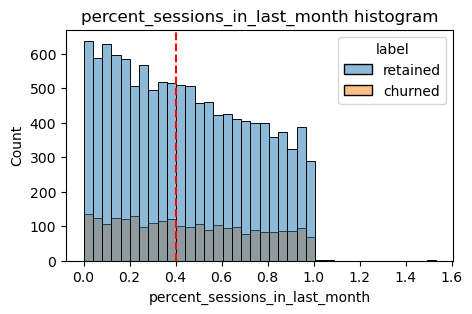

In [52]:
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

#### Check the median value of the n_days_after_onboarding variable.

In [53]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of n_days_after_onboarding for just the people who had 40% or more of their total sessions in the last month.

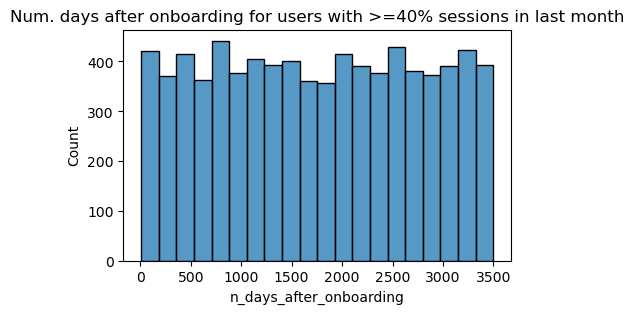

In [54]:
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### Handling outliers

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. such as the 95th percentile of the distribution.



In [55]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [56]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Call describe() to see if your change worked.

In [57]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


### Conclusion
#### Queation: What factors correlated with user churn? How?
#### Answer: Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.